In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [120]:
# Read Datasets Greenhouse Data
temp_emissions_data_raw = pd.read_csv('Datasets/TempEmissionsDataRaw.csv')
temp_emissions_data = pd.read_csv('Datasets/TempEmissionsData.csv') # Emissions normalized (10^5)

In [121]:
temp_emissions_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14826 entries, 0 to 14825
Data columns (total 4 columns):
Year                  14826 non-null int64
Country               14826 non-null object
AverageTemperature    14826 non-null float64
EmissionsValue        14826 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 463.4+ KB


In [122]:
temp_emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
Year                  263 non-null int64
AverageTemperature    263 non-null float64
EmissionsValue        263 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [123]:
# Find the Pearse Correlation value between the dependent variables (AverageTemperature) and the other variables
temp_emissions_data.corr()[['AverageTemperature']].sort_values('AverageTemperature')  

,AverageTemperature
EmissionsValue,0.856657
Year,0.892656
AverageTemperature,1.000000


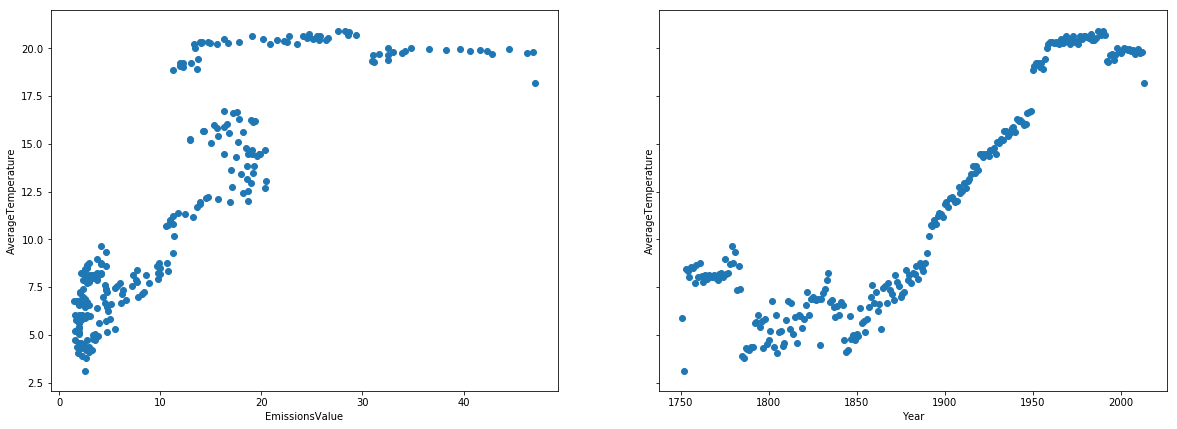

In [124]:
# Plot to verify linear relationship 

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [20, 7]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
axes[0].scatter(temp_emissions_data['EmissionsValue'], temp_emissions_data['AverageTemperature'])
axes[0].set(xlabel='EmissionsValue', ylabel='AverageTemperature')
axes[1].scatter(temp_emissions_data['Year'], temp_emissions_data['AverageTemperature'])
axes[1].set(xlabel='Year', ylabel='AverageTemperature')
plt.show() 

In [125]:
# Remove Year Column
temp_emissions_data_no_year = temp_emissions_data.drop('Year', axis=1)
temp_emissions_data_no_year

,AverageTemperature,EmissionsValue
0,5.890000,2.552000
1,3.130000,2.553000
2,8.430000,2.553000
3,8.340000,2.554000
4,8.050000,2.555000
5,8.540000,2.731000
6,8.500000,2.732000
7,7.700000,2.733000
8,8.680000,2.734000
9,8.030000,2.734000


In [126]:
#X = temp_emissions_data_no_year.iloc[:, 1].values # independent variable - GasEmissions
#y = temp_emissions_data_no_year.iloc[:, :-1].values # dependent variable - AverageTemperature
X = temp_emissions_data_no_year['EmissionsValue'].to_frame() # independent variable - GasEmissions
y = temp_emissions_data_no_year['AverageTemperature'].to_frame() # dependent variable - AverageTemperature

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [128]:
# Reshape X values for 2D array
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

print("X Train Size:", len(X_train))
print("y Train Size:", len(y_train))
print("X Test Size:", len(X_test))
print("y Test Size:", len(y_test))

X Train Size: 210
y Train Size: 210
X Test Size: 53
y Test Size: 53


In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
# instantiate the regressor class
regressor = LinearRegression()

In [131]:
# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
# Print y-intercept
print(regressor.intercept_)

# Prints the beta coefficients in same order as passed
print(regressor.coef_)

# Zip can pair features and coefficients together
zip(['EmissionsValue'], regressor.coef_)

[6.02949386]
[[0.44995317]]


In [133]:
# make a prediction set using the test set
prediction = regressor.predict(X_test)

In [134]:
# Evaluate the prediction accuracy of the model
from sklearn import metrics

print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % metrics.mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % metrics.median_absolute_error(y_test, prediction)) 
print("The Mean Squared Error: %.2f degrees celsius" % metrics.mean_squared_error(y_test, prediction)) 
print("The Root Mean Squared Error: %.2f degrees celsius" % (np.sqrt(metrics.mean_squared_error(y_test, prediction)))) 

The Explained Variance: 0.70
The Mean Absolute Error: 2.12 degrees celsius
The Median Absolute Error: 1.73 degrees celsius
The Mean Squared Error: 8.45 degrees celsius
The Root Mean Squared Error: 2.91 degrees celsius


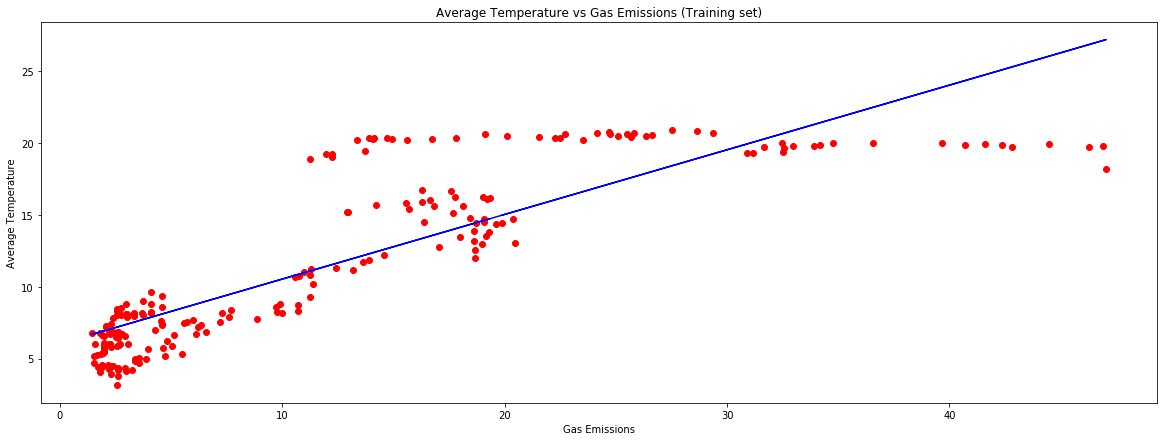

In [135]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Temperature vs Gas Emissions (Training set)')
plt.xlabel('Gas Emissions')
plt.ylabel('Average Temperature')
plt.show()

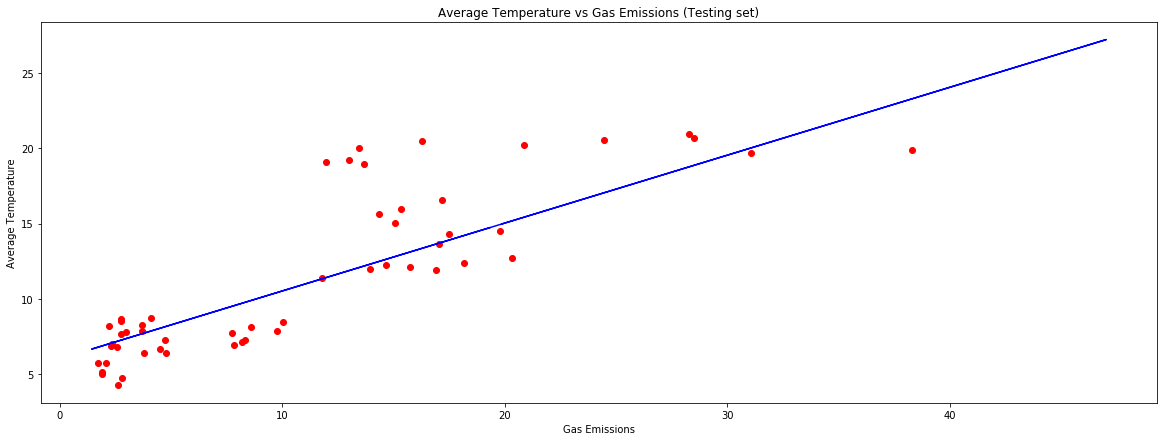

In [136]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Temperature vs Gas Emissions (Testing set)')
plt.xlabel('Gas Emissions')
plt.ylabel('Average Temperature')
plt.show()

Text(0,0.5,'Residuals')

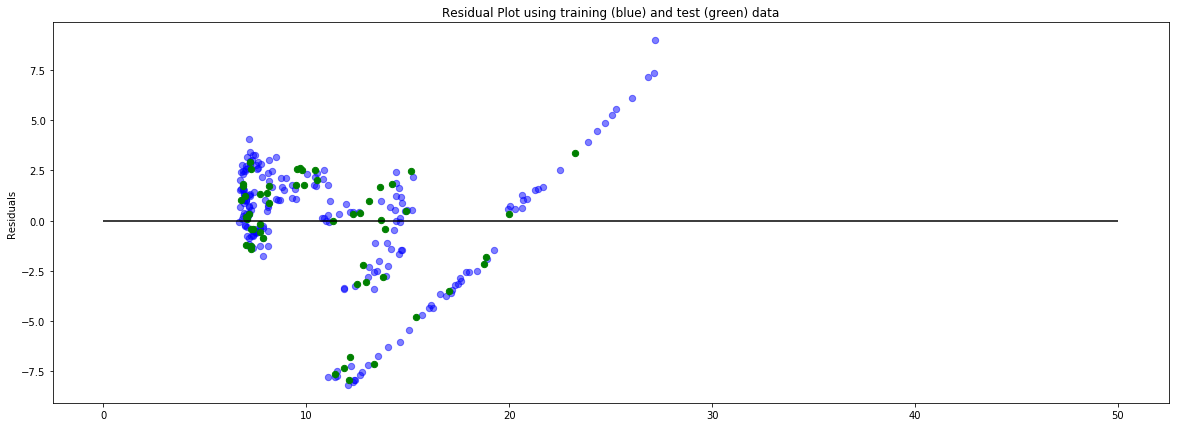

In [137]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')